In [3]:
import matplotlib.pylab as plt
%matplotlib inline

In [89]:
def num_neighbors(i,j, l):
    neighbors_coords = [(i+1,j+1),
                (i+1,j-1),
                (i+1,j),
                (i-1,j),
                (i-1,j+1),
                (i-1,j-1),
                (i,j-1),
                (i,j+1)]
    
    neighbors = []
    for x in neighbors_coords:
        if x[0]<0 or x[1]<0:
            continue
        try:
            neighbors.append(l[x[0]][x[1]])
        except:
            continue
    return neighbors


def new_ground(i,j, lines):
    neighbors = num_neighbors(i,j, lines)
    num_trees = neighbors.count('|')
    num_lumber = neighbors.count('#')
    num_ground = neighbors.count('.')
    
    if lines[i][j] == '.' and num_trees>=3:
        return '|'
    if lines[i][j] == '|' and num_lumber>=3:
        return '#'
    if lines[i][j] == '#':
        if num_trees>=1 and num_lumber>=1:
            return '#'
        else:
            return '.'
    return lines[i][j]

def get_resource_values(lines):
    lumber = 0
    trees = 0
    for x in lines:
        lumber = lumber+list(x).count('#')
        trees = trees + list(x).count('|')
    return lumber*trees

In [94]:
#lines = [x.replace('\n','') for x in open('quiz18_test.txt').readlines()]
lines = [x.replace('\n','') for x in open('quiz18.txt').readlines()]
m = len(lines)
n=len(lines[1])
count = 0

while count<10:
    new_lines = np.chararray((m,n))

    for i in range(len(lines)):
        for j in range(len(lines[i])):
            new_lines[i][j] = new_ground(i,j, lines).replace("'",'').replace('b','')
    lines = new_lines
    lines = lines.decode('UTF-8')
    count +=1
print(get_resource_values(lines))

456225


In [102]:
import pandas

df = pandas.DataFrame(columns = ['num_years', 'recource_value'])

num = 1000

lines = [x.replace('\n','') for x in open('quiz18.txt').readlines()]
m = len(lines)
n=len(lines[1])
count = 0

while count<num:
    new_lines = np.chararray((m,n))

    for i in range(len(lines)):
        for j in range(len(lines[i])):
            new_lines[i][j] = new_ground(i,j, lines).replace("'",'').replace('b','')
    lines = new_lines
    lines = lines.decode('UTF-8')
    count +=1
    df.loc[len(df)] = [count, get_resource_values(lines)]
#print(get_resource_values(lines))

In [105]:
diff = [None]
for i in range(1,len(df)):
    diff.append(df['recource_value'][i] - df['recource_value'][i-1])

df['diff'] = diff

In [119]:
possible_values = list(df['recource_value'][-28:])

In [120]:
possible_values

[192676,
 194955,
 200625,
 206064,
 212850,
 219387,
 221958,
 223468,
 224436,
 223920,
 218631,
 207776,
 207060,
 201872,
 193050,
 192556,
 191151,
 193980,
 196185,
 199341,
 198968,
 198645,
 199752,
 199374,
 199532,
 197071,
 200434,
 190164]

In [121]:
df['recource_value']

0      302736
1      378508
2      484330
3      602175
4      693482
5      698250
6      667584
7      608760
8      560859
9      456225
10     373592
11     297018
12     205145
13     139120
14      90846
15      62356
16      47961
17      34596
18      25905
19      20433
20      15515
21      12814
22      12560
23      13612
24      14952
25      17654
26      18816
27      21424
28      24725
29      27552
        ...  
970    200434
971    190164
972    192676
973    194955
974    200625
975    206064
976    212850
977    219387
978    221958
979    223468
980    224436
981    223920
982    218631
983    207776
984    207060
985    201872
986    193050
987    192556
988    191151
989    193980
990    196185
991    199341
992    198968
993    198645
994    199752
995    199374
996    199532
997    197071
998    200434
999    190164
Name: recource_value, Length: 1000, dtype: object

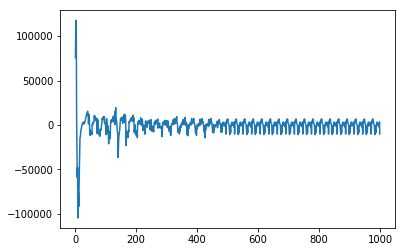

In [107]:
plt.plot(df['diff'])